# **Importing the CSV**

In [ ]:
pip install pandas-profiling

In [137]:
import pandas as pd
df = pd.read_csv("musk_csv.csv")
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [ ]:
!pip install pandas==0.25.0

# **Pandas Profiling**

**Profiling is done for Preprocessing the data to eleminate features which are not useful**

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df)


/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [ ]:
rejected = profile.get_rejected_variables()

In [ ]:
df.drop(rejected, axis = 1,inplace = True)

In [ ]:
df.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f16,f17,f18,f19,f20,f21,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f35,f36,f37,f38,f39,f40,...,f92,f93,f94,f95,f96,f97,f102,f106,f107,f116,f122,f124,f125,f126,f129,f131,f132,f133,f134,f136,f137,f138,f140,f145,f146,f147,f148,f151,f155,f156,f157,f158,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-307,-31,-106,-227,-42,-59,-67,189,81,17,-27,-89,-67,105,-116,124,-106,-120,63,-165,40,-27,68,...,119,-120,-312,23,-55,-53,148,-230,-166,-5,72,-107,80,25,-114,45,-118,-75,-182,-19,12,-13,-119,-177,-101,-116,-14,-81,128,3,-244,-308,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-300,54,-149,-98,-196,-27,2,75,49,-34,45,-91,32,95,-116,85,-23,-58,61,-171,2,-144,38,...,82,14,-101,28,-52,-43,137,-262,-165,49,131,-77,-10,-17,-21,32,-128,-72,-124,-94,53,-79,-35,-177,-102,-121,-66,-41,115,-5,-235,-59,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-303,52,-152,-97,-225,-28,2,179,49,-33,46,-88,22,79,-116,19,-11,-38,71,-175,3,-129,37,...,47,-10,-85,19,40,-10,122,-265,-168,12,122,-36,-129,19,0,-15,-129,-74,-125,-93,53,-72,-33,-177,-102,-119,-66,-41,77,-163,-238,-134,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-301,54,-150,-98,-196,-28,2,77,48,-34,46,-91,32,94,-116,84,-23,-58,62,-171,3,-144,38,...,82,13,-101,28,-50,-44,137,-263,-166,50,131,-78,-12,-18,-20,32,-128,-73,-125,-93,53,-78,-34,-177,-101,-121,-65,-41,115,-7,-236,-60,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-301,54,-150,-98,-196,-28,2,78,48,-34,46,-91,31,94,-116,84,-23,-58,62,-171,3,-144,38,...,82,13,-101,28,-50,-44,137,-263,-166,50,131,-78,-12,-18,-20,32,-128,-73,-125,-93,53,-78,-34,-177,-101,-121,-65,-41,115,-8,-236,-60,52,104,137,168,-60,-135,80,1


In [ ]:
df_copy = df
df_copy.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f16,f17,f18,f19,f20,f21,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f35,f36,f37,f38,f39,f40,...,f92,f93,f94,f95,f96,f97,f102,f106,f107,f116,f122,f124,f125,f126,f129,f131,f132,f133,f134,f136,f137,f138,f140,f145,f146,f147,f148,f151,f155,f156,f157,f158,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-307,-31,-106,-227,-42,-59,-67,189,81,17,-27,-89,-67,105,-116,124,-106,-120,63,-165,40,-27,68,...,119,-120,-312,23,-55,-53,148,-230,-166,-5,72,-107,80,25,-114,45,-118,-75,-182,-19,12,-13,-119,-177,-101,-116,-14,-81,128,3,-244,-308,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-300,54,-149,-98,-196,-27,2,75,49,-34,45,-91,32,95,-116,85,-23,-58,61,-171,2,-144,38,...,82,14,-101,28,-52,-43,137,-262,-165,49,131,-77,-10,-17,-21,32,-128,-72,-124,-94,53,-79,-35,-177,-102,-121,-66,-41,115,-5,-235,-59,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-303,52,-152,-97,-225,-28,2,179,49,-33,46,-88,22,79,-116,19,-11,-38,71,-175,3,-129,37,...,47,-10,-85,19,40,-10,122,-265,-168,12,122,-36,-129,19,0,-15,-129,-74,-125,-93,53,-72,-33,-177,-102,-119,-66,-41,77,-163,-238,-134,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-301,54,-150,-98,-196,-28,2,77,48,-34,46,-91,32,94,-116,84,-23,-58,62,-171,3,-144,38,...,82,13,-101,28,-50,-44,137,-263,-166,50,131,-78,-12,-18,-20,32,-128,-73,-125,-93,53,-78,-34,-177,-101,-121,-65,-41,115,-7,-236,-60,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-301,54,-150,-98,-196,-28,2,78,48,-34,46,-91,31,94,-116,84,-23,-58,62,-171,3,-144,38,...,82,13,-101,28,-50,-44,137,-263,-166,50,131,-78,-12,-18,-20,32,-128,-73,-125,-93,53,-78,-34,-177,-101,-121,-65,-41,115,-8,-236,-60,52,104,137,168,-60,-135,80,1


**Dropping the cateogorical data**

In [ ]:
X = df.drop(['class','ID','molecule_name','conformation_name'], axis=1)
y = df['class']
y

**Normaliziing the data points **

In [ ]:
from sklearn import preprocessing
normalized_X = preprocessing.normalize(X)
normalized_X

**Using Stratified K fold cross-validation that preserves the imbalanced class distribution in each fold**

In [88]:
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state= 7)

# **Testing Logistic Regression for Classification**

In [141]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
weights = {0:1.0, 1:5.0}
classifier = LogisticRegression(random_state = 0,class_weight= weights) 
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight={0: 1.0, 1: 5.0}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [146]:
y_pred = classifier.predict(X_test)

**Confusion Matrix for Logistic regression**

In [147]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred) 
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[998  99]
 [ 30 193]]


**Getting Accuracy for Logistic Regression**

In [144]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.9022727272727272


**Since data is imbalanced, Accuracy is not a good metric to evaluate. Looking at confusion matrix we can see that the results are not good for minority class.**

In [87]:
# Our vectorized labels
import numpy as np
y_train_vec = np.asarray(y_train).reshape((-1,1))
y_test_vec = np.asarray(y_test).reshape((-1,1))
import matplotlib.pyplot as plt
%matplotlib inline

**Using Neural Network for classification as the results for Logistic Regression were poor clearly seen from confusuin matrix**

***Using layered neural network having 3 hidden layers having 128,64,32 nodes having relu,relu,sigmoid activation respectively ***

**Changing the class weight to 7:1 as the class are distributed in 1:5 ratio**

**Plotting the Accuracy and Loss graphs with each fold** 

Epoch 1/30
6/6 - 1s - loss: 1.1295 - fn: 111.0000 - fp: 2929.0000 - tn: 1555.0000 - tp: 683.0000 - precision: 0.1891 - recall: 0.8602 - acc: 0.4240 - val_loss: 0.7203 - val_fn: 22.0000 - val_fp: 437.0000 - val_tn: 660.0000 - val_tp: 201.0000 - val_precision: 0.3150 - val_recall: 0.9013 - val_acc: 0.6523
Epoch 2/30
6/6 - 0s - loss: 0.8253 - fn: 158.0000 - fp: 1107.0000 - tn: 3377.0000 - tp: 636.0000 - precision: 0.3649 - recall: 0.8010 - acc: 0.7603 - val_loss: 0.4357 - val_fn: 18.0000 - val_fp: 291.0000 - val_tn: 806.0000 - val_tp: 205.0000 - val_precision: 0.4133 - val_recall: 0.9193 - val_acc: 0.7659
Epoch 3/30
6/6 - 0s - loss: 0.7016 - fn: 134.0000 - fp: 896.0000 - tn: 3588.0000 - tp: 660.0000 - precision: 0.4242 - recall: 0.8312 - acc: 0.8049 - val_loss: 0.3576 - val_fn: 17.0000 - val_fp: 242.0000 - val_tn: 855.0000 - val_tp: 206.0000 - val_precision: 0.4598 - val_recall: 0.9238 - val_acc: 0.8038
Epoch 4/30
6/6 - 0s - loss: 0.6115 - fn: 141.0000 - fp: 558.0000 - tn: 3926.0000 - tp:

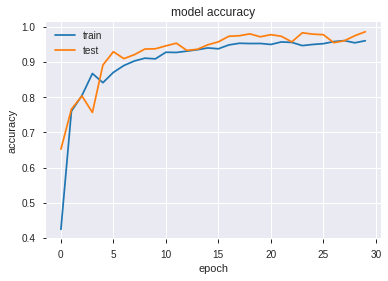

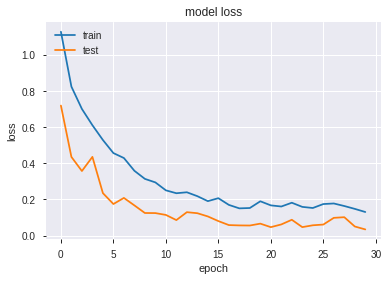

Epoch 1/30
6/6 - 1s - loss: 1.0522 - fn: 150.0000 - fp: 1970.0000 - tn: 2514.0000 - tp: 644.0000 - precision: 0.2464 - recall: 0.8111 - acc: 0.5983 - val_loss: 0.7111 - val_fn: 12.0000 - val_fp: 460.0000 - val_tn: 637.0000 - val_tp: 211.0000 - val_precision: 0.3145 - val_recall: 0.9462 - val_acc: 0.6424
Epoch 2/30
6/6 - 0s - loss: 0.7670 - fn: 126.0000 - fp: 1143.0000 - tn: 3341.0000 - tp: 668.0000 - precision: 0.3689 - recall: 0.8413 - acc: 0.7596 - val_loss: 0.4885 - val_fn: 15.0000 - val_fp: 340.0000 - val_tn: 757.0000 - val_tp: 208.0000 - val_precision: 0.3796 - val_recall: 0.9327 - val_acc: 0.7311
Epoch 3/30
6/6 - 0s - loss: 0.6379 - fn: 117.0000 - fp: 890.0000 - tn: 3594.0000 - tp: 677.0000 - precision: 0.4320 - recall: 0.8526 - acc: 0.8092 - val_loss: 0.3588 - val_fn: 15.0000 - val_fp: 246.0000 - val_tn: 851.0000 - val_tp: 208.0000 - val_precision: 0.4581 - val_recall: 0.9327 - val_acc: 0.8023
Epoch 4/30
6/6 - 0s - loss: 0.5433 - fn: 91.0000 - fp: 740.0000 - tn: 3744.0000 - tp: 

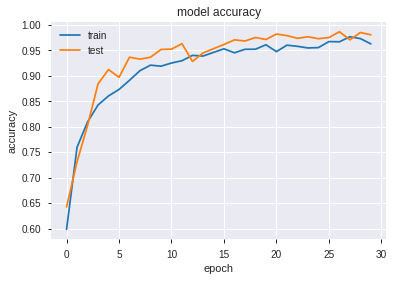

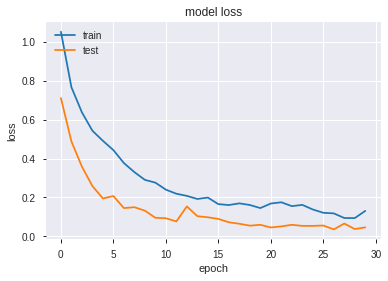

Epoch 1/30
6/6 - 1s - loss: 1.0890 - fn: 290.0000 - fp: 1250.0000 - tn: 3234.0000 - tp: 504.0000 - precision: 0.2873 - recall: 0.6348 - acc: 0.7082 - val_loss: 0.3212 - val_fn: 96.0000 - val_fp: 104.0000 - val_tn: 993.0000 - val_tp: 127.0000 - val_precision: 0.5498 - val_recall: 0.5695 - val_acc: 0.8485
Epoch 2/30
6/6 - 0s - loss: 0.8397 - fn: 151.0000 - fp: 1135.0000 - tn: 3349.0000 - tp: 643.0000 - precision: 0.3616 - recall: 0.8098 - acc: 0.7563 - val_loss: 0.3310 - val_fn: 42.0000 - val_fp: 154.0000 - val_tn: 943.0000 - val_tp: 181.0000 - val_precision: 0.5403 - val_recall: 0.8117 - val_acc: 0.8515
Epoch 3/30
6/6 - 0s - loss: 0.6749 - fn: 82.0000 - fp: 1061.0000 - tn: 3423.0000 - tp: 712.0000 - precision: 0.4016 - recall: 0.8967 - acc: 0.7834 - val_loss: 0.3016 - val_fn: 28.0000 - val_fp: 150.0000 - val_tn: 947.0000 - val_tp: 195.0000 - val_precision: 0.5652 - val_recall: 0.8744 - val_acc: 0.8652
Epoch 4/30
6/6 - 0s - loss: 0.5822 - fn: 73.0000 - fp: 937.0000 - tn: 3547.0000 - tp: 

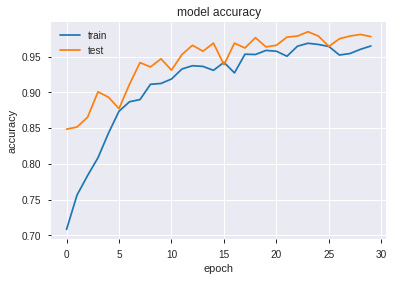

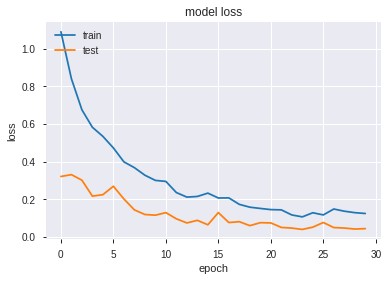

Epoch 1/30
6/6 - 1s - loss: 1.0931 - fn: 156.0000 - fp: 2373.0000 - tn: 2111.0000 - tp: 638.0000 - precision: 0.2119 - recall: 0.8035 - acc: 0.5208 - val_loss: 0.3151 - val_fn: 118.0000 - val_fp: 16.0000 - val_tn: 1081.0000 - val_tp: 105.0000 - val_precision: 0.8678 - val_recall: 0.4709 - val_acc: 0.8985
Epoch 2/30
6/6 - 0s - loss: 0.8944 - fn: 190.0000 - fp: 1011.0000 - tn: 3473.0000 - tp: 604.0000 - precision: 0.3740 - recall: 0.7607 - acc: 0.7725 - val_loss: 0.3069 - val_fn: 64.0000 - val_fp: 70.0000 - val_tn: 1027.0000 - val_tp: 159.0000 - val_precision: 0.6943 - val_recall: 0.7130 - val_acc: 0.8985
Epoch 3/30
6/6 - 0s - loss: 0.7362 - fn: 100.0000 - fp: 1146.0000 - tn: 3338.0000 - tp: 694.0000 - precision: 0.3772 - recall: 0.8741 - acc: 0.7639 - val_loss: 0.2816 - val_fn: 57.0000 - val_fp: 57.0000 - val_tn: 1040.0000 - val_tp: 166.0000 - val_precision: 0.7444 - val_recall: 0.7444 - val_acc: 0.9136
Epoch 4/30
6/6 - 0s - loss: 0.6286 - fn: 155.0000 - fp: 573.0000 - tn: 3911.0000 - t

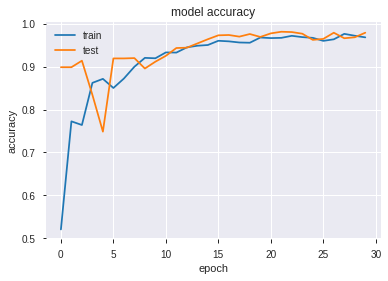

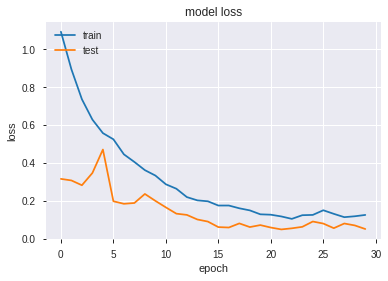

Epoch 1/30
6/6 - 1s - loss: 1.0778 - fn: 218.0000 - fp: 1793.0000 - tn: 2691.0000 - tp: 576.0000 - precision: 0.2431 - recall: 0.7254 - acc: 0.6190 - val_loss: 0.6302 - val_fn: 22.0000 - val_fp: 401.0000 - val_tn: 696.0000 - val_tp: 201.0000 - val_precision: 0.3339 - val_recall: 0.9013 - val_acc: 0.6795
Epoch 2/30
6/6 - 0s - loss: 0.7695 - fn: 142.0000 - fp: 1079.0000 - tn: 3405.0000 - tp: 652.0000 - precision: 0.3767 - recall: 0.8212 - acc: 0.7687 - val_loss: 0.3291 - val_fn: 35.0000 - val_fp: 146.0000 - val_tn: 951.0000 - val_tp: 188.0000 - val_precision: 0.5629 - val_recall: 0.8430 - val_acc: 0.8629
Epoch 3/30
6/6 - 0s - loss: 0.6239 - fn: 109.0000 - fp: 805.0000 - tn: 3679.0000 - tp: 685.0000 - precision: 0.4597 - recall: 0.8627 - acc: 0.8268 - val_loss: 0.2439 - val_fn: 48.0000 - val_fp: 94.0000 - val_tn: 1003.0000 - val_tp: 175.0000 - val_precision: 0.6506 - val_recall: 0.7848 - val_acc: 0.8924
Epoch 4/30
6/6 - 0s - loss: 0.5557 - fn: 80.0000 - fp: 789.0000 - tn: 3695.0000 - tp: 

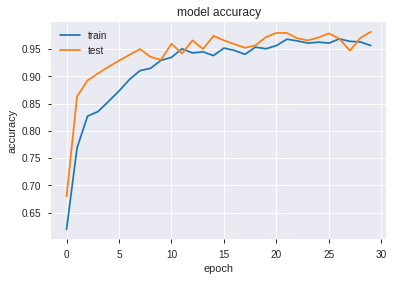

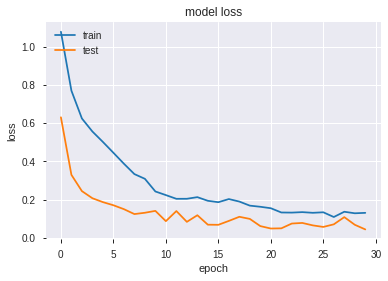

In [149]:
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Dense
# Neural network
model_history   = {'Recall': [], 'Precision':[], 'Accuracy':[], 'Loss':[] }

for train, test in kfold.split(X, y):
  model = Sequential()
  model.add(Dense(128, input_dim=X_train.shape[-1], activation='relu'))
  model.add(keras.layers.Dropout(0.3))
  model.add(Dense(64, activation='relu'))
  model.add(keras.layers.Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  #model.add(keras.layers.Dropout(0.1))
  model.add(Dense(1, activation='sigmoid'))
  metrics = [
      keras.metrics.FalseNegatives(name="fn"),
      keras.metrics.FalsePositives(name="fp"),
      keras.metrics.TrueNegatives(name="tn"),
      keras.metrics.TruePositives(name="tp"),
      keras.metrics.Precision(name="precision"),
      keras.metrics.Recall(name="recall"),
      keras.metrics.BinaryAccuracy(name="acc")

  ]

  model.compile(
      optimizer=keras.optimizers.Adam(1e-2), loss="binary_crossentropy", metrics=metrics
  )

  callbacks = [keras.callbacks.ModelCheckpoint("model_at_epoch_{epoch}.h5")]
  weight = {0: 1.0, 1: 6.0}

  history = model.fit(
      X_train,
      y_train_vec,
      batch_size=1024,
      epochs=30,
      verbose=2,
      callbacks= callbacks,
      validation_data=(X_test, y_test_vec),
      class_weight = weight,
  )

  
  # summarize history for accuracy
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  model_history['Loss'].append(history.history.get('loss')[-1])
  model_history['Precision'].append(history.history.get('precision')[-1])
  model_history['Recall'].append(history.history.get('recall')[-1])
  model_history['Accuracy'].append(history.history.get('acc')[-1])



**Having an average of all the parameters like Accuracy, Recall, Loss, F1score,Precision with each fold**


In [151]:
Final_Accuracy = np.mean(model_history['Accuracy'])
Final_Recall = np.mean(model_history['Recall'])
Final_Precision = np.mean(model_history['Precision'])
Final_Loss = np.mean(model_history['Loss'])
Final_F1score = 2 * (Final_Precision * Final_Recall) / (Final_Precision + Final_Recall)

In [150]:
print('Final_Accuracy is', Final_Accuracy)
print('Final_Recall is', Final_Recall)
print('Final_Precision is', Final_Precision)
print('Final_Loss is', Final_Loss)
print('Final_F1score is', Final_F1score)




Final_Accuracy is 0.9737779378890992
Final_Recall is 0.9846347570419312
Final_Precision is 0.8610971093177795
Final_Loss is 0.10104500204324722
Final_F1score is 0.9187316516291671
